# Performance Evaluation

This notebook shows the different metrics introduced in the lecture with the help of examples (e.g. precision, recall, f-measure, etc.).

## Examples
The following lists show the results of two search engines where a "1" entry means that a relevant document has been found and where a "0" entry means the opposite. Both search engines find all relevant documents.

In [1]:
import math
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
search_engine_1 = [0,0,0,1,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1]
search_engine_2 = [1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1]

relevant_documents = sum(search_engine_1)
irrelevant_documents = len(search_engine_1) - sum(search_engine_1)

### Precision and Recall
Reminder:
- Precision = $\frac{\text{Number of relevant documents retrieved}}{\text{Total number of retrieved documents}}$ <br><br>
- Recall = $\frac{\text{Number of relevant documents retrieved}}{\text{Total number of relevant documents}}$

The following plot shows an exemplary precision-recall curve and the optimal point to reach:

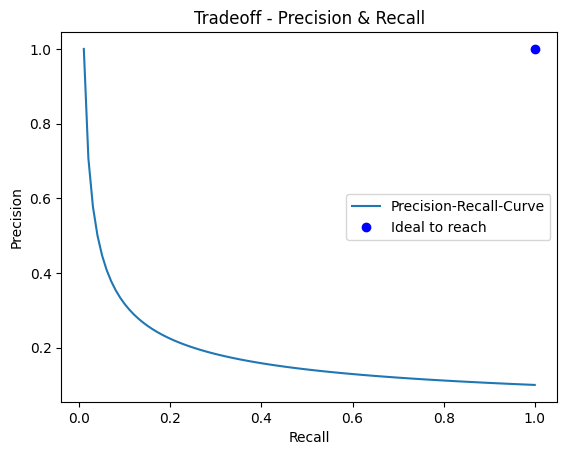

In [3]:
x = [round(x / 100, 3) for x in range(1,100+1,1)]
y = [1 / math.pow(x,0.5) for x in range(1,100+1,1)]

plt.plot(x, y, label='Precision-Recall-Curve')
plt.plot(1, 1, 'bo', label='Ideal to reach')

plt.legend(loc='center right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Tradeoff - Precision & Recall')

plt.show()

The following function gets the precisions at each step it changes and its respective recall at that step:

In [4]:
def get_pr_at_i(results, total):
    res = []

    positive_counts = 0
    for i in range(len(results)):
        # only at change of recall, i.e. a new relevant document is added
        if results[i] == 1:
            positive_counts += results[i]
            precision_at_i = positive_counts / (i+1)
            res.append((precision_at_i, positive_counts / total))

    return res

For our default precision-recall curve, we are only interested in the different precision values:

In [5]:
def get_p_at(results, total):
    pr_at_i = get_pr_at_i(results, total)

    # unzipping [(p_0,r_0), (p_1,r_1),..] to [(p_0,p_1,..), (r_0,r_1,..)] and then only taking the precisions
    return list(zip(*pr_at_i))[0]

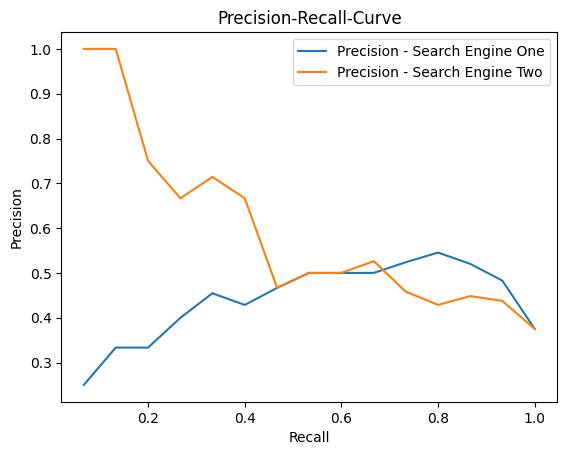

In [6]:
recall_levels = [round(x / relevant_documents, 3) for x in range(1, relevant_documents+1, 1)]
precisions_at_one = get_p_at(search_engine_1, relevant_documents)
precisions_at_two = get_p_at(search_engine_2, relevant_documents)

plt.plot(recall_levels, precisions_at_one, label='Precision - Search Engine One')
plt.plot(recall_levels, precisions_at_two, label='Precision - Search Engine Two')

plt.legend(loc='upper right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall-Curve')

plt.show()

For the interpolated variant, we are interested in the maximum precision value with a higher or equal recall value to the current step (in this case from 0.1 to 1.0 with 0.1 steps). "The highest value to the right from our original curve":

In [7]:
def get_p_at_interpolated(results, total):
    pr_at_i = get_pr_at_i(results, total)

    # for each recall level (0.1,..,1.0) find the maximum precision (see max(.., key=..)) where the recall is higher or equal (see filter(..)) to the current recall level
    return list(zip(*
                    [max(list(filter(lambda x: x[1]>=recall, pr_at_i)), key=lambda x: x[0])
                     for recall in [lvl / 10 for lvl in range(1, 10+1, 1)]]
                    ))[0]

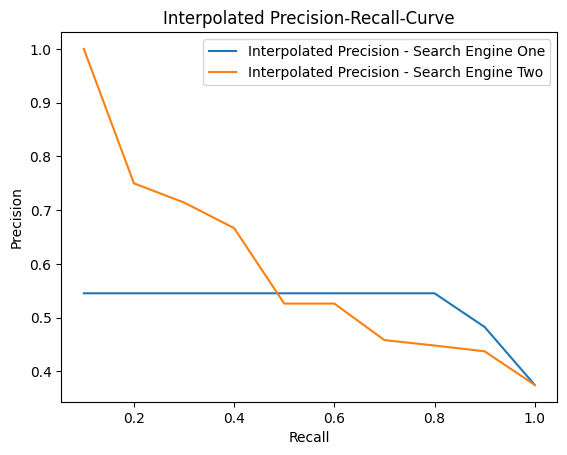

In [8]:
recall_levels = [round(x / 10, 3) for x in range(1, 10+1, 1)]
precisions_at_one = get_p_at_interpolated(search_engine_1, relevant_documents)
precisions_at_two = get_p_at_interpolated(search_engine_2, relevant_documents)

plt.plot(recall_levels, precisions_at_one, label='Interpolated Precision - Search Engine One')
plt.plot(recall_levels, precisions_at_two, label='Interpolated Precision - Search Engine Two')

plt.legend(loc='upper right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Interpolated Precision-Recall-Curve')

plt.show()

### R-Precision

For r-precision we are interested in each precision up until r documents are retrieved:

In [9]:
def get_r_p(results, total):
    res = []

    positive_counts = 0
    for i in range(total):
        # taking every change in precision into account
        positive_counts += results[i]
        precision_at_i = positive_counts / (i+1)
        res.append(precision_at_i)

    return res

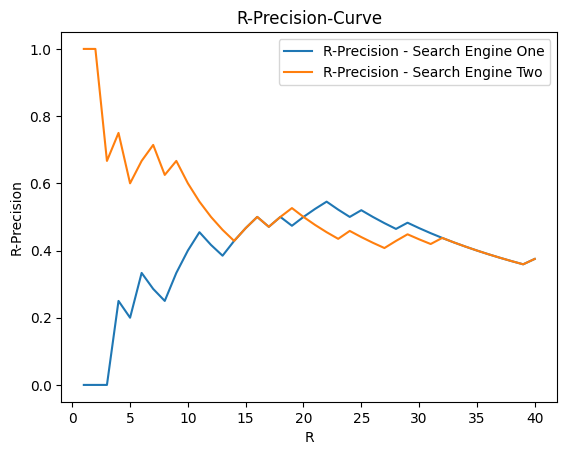

In [10]:
recall_levels = [x for x in range(1, len(search_engine_1)+1, 1)]
r_precisions_at_one = get_r_p(search_engine_1, len(search_engine_1))
r_precisions_at_two = get_r_p(search_engine_2, len(search_engine_2))

plt.plot(recall_levels, r_precisions_at_one, label='R-Precision - Search Engine One')
plt.plot(recall_levels, r_precisions_at_two, label='R-Precision - Search Engine Two')

plt.legend(loc='upper right')
plt.ylabel('R-Precision')
plt.xlabel('R')
plt.title('R-Precision-Curve')

plt.show()

### F- and E-Measure

The F-Measure is the harmonic mean between precision and recall which can be further parametrized to the E-Measure:
- $F = \frac{2PR}{P+R}$
- $E = \frac{(1+\beta^2)*PR}{\beta^2*P+R}, \ where \ E = F \ for \ \beta = 1$

In [11]:
def get_harmonic_pr_at_i(results, total, beta):
    pr_at_i = get_pr_at_i(results, total)

    return [((1+beta*beta)*pr[0]*pr[1]) / (beta*beta*pr[0]+pr[1]) for pr in pr_at_i]

In [12]:
def get_fmeasure_at_i(results, total):
    return get_harmonic_pr_at_i(results, total, 1)

The usual F-Measure:

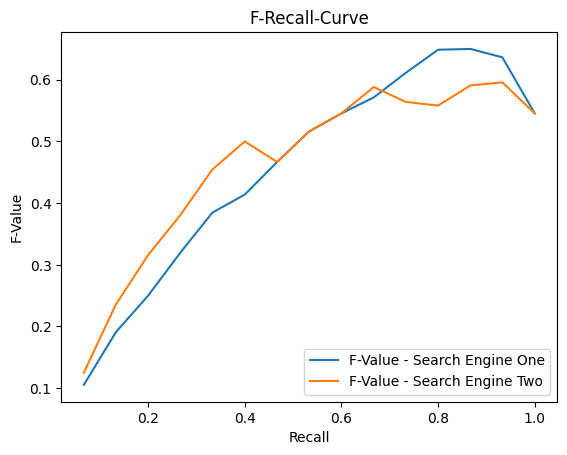

In [13]:
recall_levels = [round(x / relevant_documents, 3) for x in range(1, relevant_documents+1, 1)]
f_values_at_one = get_fmeasure_at_i(search_engine_1, relevant_documents)
f_values_at_two = get_fmeasure_at_i(search_engine_2, relevant_documents)

plt.plot(recall_levels, f_values_at_one, label='F-Value - Search Engine One')
plt.plot(recall_levels, f_values_at_two, label='F-Value - Search Engine Two')

plt.legend(loc='lower right')
plt.ylabel('F-Value')
plt.xlabel('Recall')
plt.title('F-Recall-Curve')

plt.show()

The E-Measure in favor of recall:

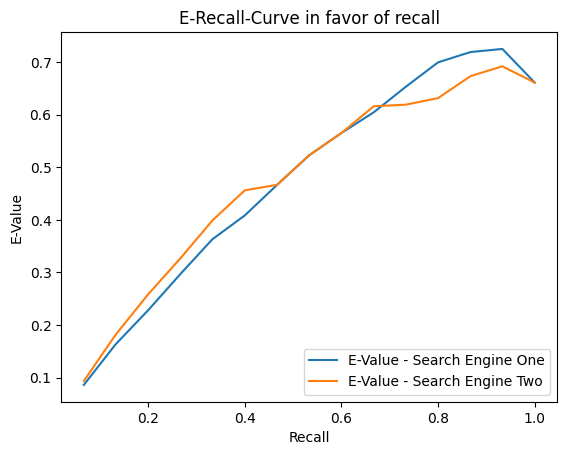

In [14]:
recall_levels = [round(x / relevant_documents, 3) for x in range(1, relevant_documents+1, 1)]
e_values_at_one = get_harmonic_pr_at_i(search_engine_1, relevant_documents, 1.5)
e_values_at_two = get_harmonic_pr_at_i(search_engine_2, relevant_documents, 1.5)

plt.plot(recall_levels, e_values_at_one, label='E-Value - Search Engine One')
plt.plot(recall_levels, e_values_at_two, label='E-Value - Search Engine Two')

plt.legend(loc='lower right')
plt.ylabel('E-Value')
plt.xlabel('Recall')
plt.title('E-Recall-Curve in favor of recall')

plt.show()

The E-Measure in favor of precision:

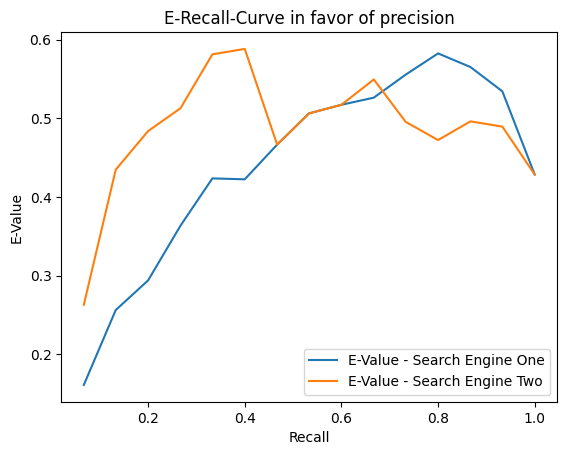

In [15]:
recall_levels = [round(x / relevant_documents, 3) for x in range(1, relevant_documents+1, 1)]
e_values_at_one = get_harmonic_pr_at_i(search_engine_1, relevant_documents, 0.5)
e_values_at_two = get_harmonic_pr_at_i(search_engine_2, relevant_documents, 0.5)

plt.plot(recall_levels, e_values_at_one, label='E-Value - Search Engine One')
plt.plot(recall_levels, e_values_at_two, label='E-Value - Search Engine Two')

plt.legend(loc='lower right')
plt.ylabel('E-Value')
plt.xlabel('Recall')
plt.title('E-Recall-Curve in favor of precision')

plt.show()

### Inverted Precision and Fallout

This a self-created measure that focuses on the irrelevant documents that have been retrieved and thus, may be seen as inverse to the precision-recall curves:
- Inverted Precision = $\frac{\text{Number of irrelevant documents retrieved}}{\text{Total number of retrieved documents}}$ <br><br>
- Fallout = $\frac{\text{Number of irrelevant documents retrieved}}{\text{Total number of irrelevant documents}}$

In [16]:
def get_pr_at_i_inverted(results, total):
    res = []

    negative_counts = 0
    for i in range(len(results)):
        # only at change of fallout, i.e. a new irrelevant document is added
        if results[i] == 0:
            negative_counts += 1
            inverted_precision_at_i = negative_counts / (i+1)
            res.append((inverted_precision_at_i, negative_counts / total))

    return res

In [17]:
# uses the same unzipping as seen above in the precision-recall variant
def get_p_at_inverted(results, total):
    pr_at_i_inverted = get_pr_at_i_inverted(results, total)

    return list(zip(*pr_at_i_inverted))[0]

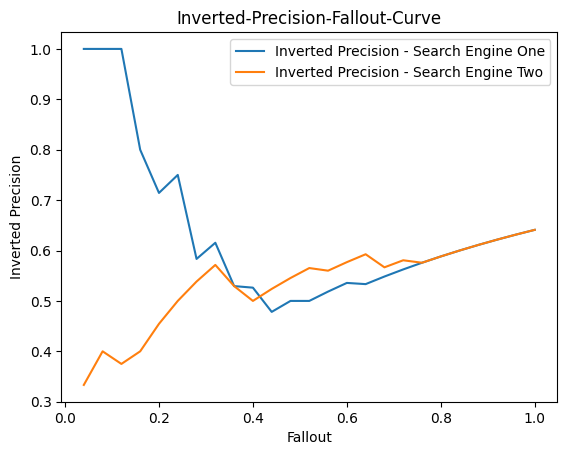

In [18]:
fallout_levels = [round(x / irrelevant_documents, 3) for x in range(1, irrelevant_documents+1, 1)]
precisions_at_one_inverted = get_p_at_inverted(search_engine_1, irrelevant_documents)
precisions_at_two_inverted = get_p_at_inverted(search_engine_2, irrelevant_documents)

plt.plot(fallout_levels, precisions_at_one_inverted, label='Inverted Precision - Search Engine One')
plt.plot(fallout_levels, precisions_at_two_inverted, label='Inverted Precision - Search Engine Two')

plt.legend(loc='upper right')
plt.ylabel('Inverted Precision')
plt.xlabel('Fallout')
plt.title('Inverted-Precision-Fallout-Curve')

plt.show()